# Qiskit and Pennylane for Parmeterized Quantum Circuits

## Qiskit

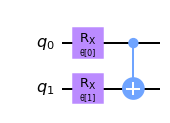

In [1]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister, ParameterVector
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram

# Create a Quantum Register with 2 qubits.
qc = QuantumCircuit(2)
theta = ParameterVector('θ', 2)
qc.rx(theta[0], 0)
qc.rx(theta[1], 1)
qc.cx(0, 1)
qc.draw(output='mpl') # use 'mpl' to get a matplotlib figure. you should have pylatexenc installed

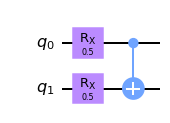

In [2]:
# you have to assign parameters to the circuit before you can simulate it
qc = qc.assign_parameters({theta[0]: 0.5, theta[1]: 0.5})
qc.draw(output='mpl')

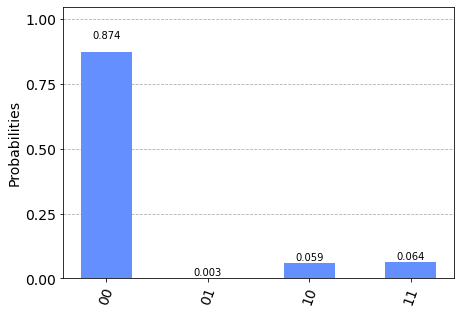

In [3]:
qc.measure_all()
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=1000)
result = job.result()
counts = result.get_counts(qc)
plot_histogram(counts)

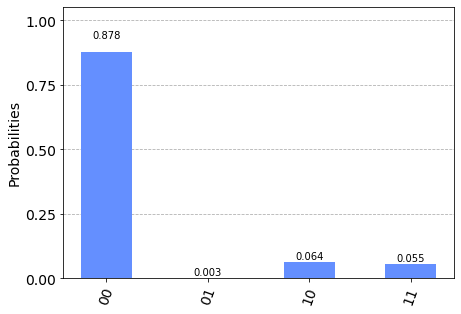

In [4]:
# TIP: you can also use the QuantumInstance class to run your circuit
from qiskit.utils import QuantumInstance

qi = QuantumInstance(backend, shots=1000)
results = qi.execute(qc)
counts = results.get_counts()
plot_histogram(counts)

## [Pennylane](https://docs.pennylane.ai/en/stable/)

Good for evaluating gradients of parameterized quantum circuits. Designed to be used for quantum machine learning applications.

There are advantages and disadvantages to both. Qiskit is more mature and has more features, but Pennylane is more flexible and has a more modern interface.

In [5]:
# installation is easy with pip
!pip install pennylane pennylane-qiskit #for qiskit integration


[notice] A new release of pip available: 22.1.2 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [7]:
import pennylane as qml

dev = qml.device('default.qubit', wires=2) # you can also use the qiskit.aer simulator

def circuit(theta):
    qml.RX(theta[0], wires=0)
    qml.RX(theta[1], wires=1)
    qml.CNOT(wires=[0, 1])

@qml.qnode(dev)
def my_circuit(theta):
    circuit(theta)
    return qml.expval(qml.PauliZ(0))
    

(<Figure size 360x216 with 1 Axes>, <Axes:>)

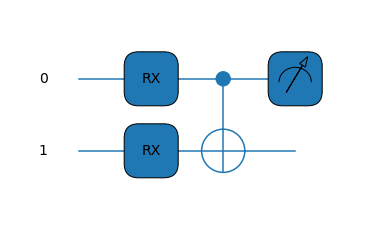

In [8]:
qml.draw_mpl(my_circuit)([0.5, 0.5])

In [9]:
my_circuit([0.5, 0.5]) # torch.tensor-like interface. you can get gradients and stuff for backprop.

tensor(0.87758256, requires_grad=True)